In [17]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# Load dataset
image_array = np.loadtxt('../Data Cleaning & Transformation/Data/image_array.csv', delimiter=',')
labels = np.loadtxt('../Data Cleaning & Transformation/Data/image_label_array.csv', delimiter=',', dtype=str)

# 1. Train-Test Split

In [31]:
# Randomly shuffle the indices
indices = np.random.permutation(image_array.shape[0])
size = round(indices.shape[0]*0.8)
training_idx, test_idx = indices[:size], indices[size:]

# Split the data
training_X, test_X = image_array[training_idx,:], image_array[test_idx,:]
training_y, test_y = labels[training_idx], labels[test_idx]

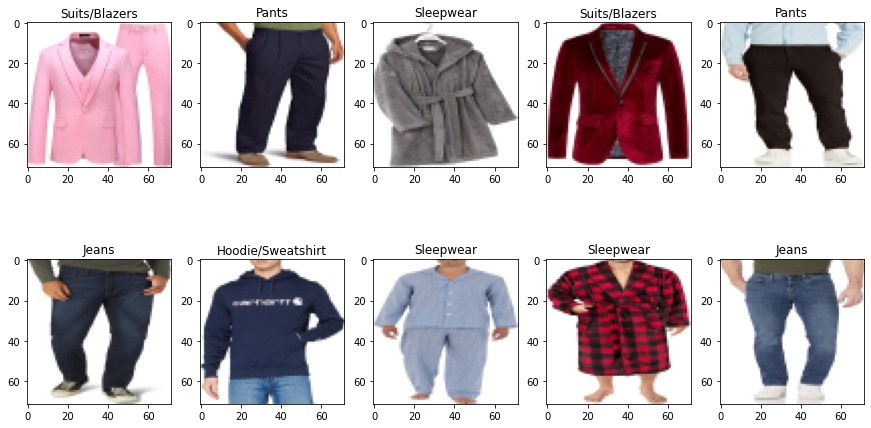

In [37]:
randomlist = random.sample(range(0,test_X.shape[0]), 5)

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    img_temp_1 = training_X[randomlist[i]].reshape(72,72,3)
    plt.imshow(img_temp_1.astype('uint8'))
    plt.title(training_y[randomlist[i]])
    plt.subplot(2,5,i+6)
    img_temp_2 = test_X[randomlist[i]].reshape(72,72,3)
    plt.imshow(img_temp_2.astype('uint8'))
    plt.title(test_y[randomlist[i]])
plt.show()

# 2. Data Transformation

### Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler((0,1))
scaled_train = scaler.fit_transform(training_X)

## Reducing the data

### PCA

In [46]:
from sklearn.decomposition import PCA

# Account for 99% of variance
pca = PCA(0.99)
# Transformed image
pca_transformed = pca.fit_transform(scaled_train)

print(f'{scaled_train.shape[1]} features has been reduced to {pca_transformed.shape[1]}')

15552 features has been reduced to 361


In [47]:
# Inverese the PCA transformed to original for display
inversed_2d = pca.inverse_transform(pca_transformed)
inveresed_3d = inversed_2d.reshape(inversed_2d.shape[0], 72, 72, 3)

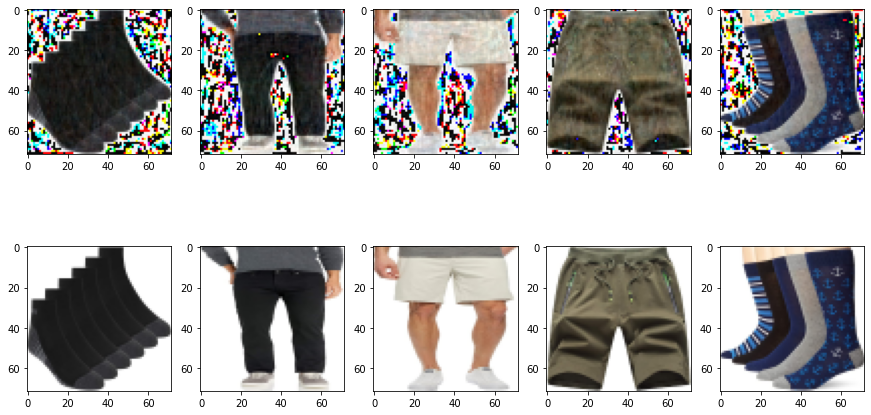

In [54]:
# Compare and display 5 inversed PCA images and its original images
randomlist = random.sample(range(0,inveresed_3d.shape[0]), 5)

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    img_temp_1 = inveresed_3d[randomlist[i]]*255
    plt.imshow(img_temp_1.astype('uint8'))
    #plt.imshow(inveresed_3d[randomlist[i], :])
    plt.subplot(2,5,i+6)
    img_temp_2 = training_X[randomlist[i]].reshape(72,72,3)
    plt.imshow(img_temp_2.astype('uint8'))
    #plt.imshow(training_idx[randomlist[i], :])
plt.show()